<a href="https://colab.research.google.com/github/taehohoho/LESSON/blob/master/210930_CNN_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow
tensorflow.__version__

'2.6.0'

In [4]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [6]:
X_train = X_train.astype(float)/ 255
X_test = X_test.astype(float)/ 255

In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation = 'relu'))
model.add(layers.Dense(units=10, activation = 'softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [14]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [16]:
%%time

Hist_mnist = model.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 38s 16ms/step - loss: 0.2811 - accuracy: 0.9110 - val_loss: 0.0835 - val_accuracy: 0.9731
Epoch 2/100
375/375 [==============================] - 6s 15ms/step - loss: 0.0661 - accuracy: 0.9795 - val_loss: 0.0568 - val_accuracy: 0.9833
Epoch 3/100
375/375 [==============================] - 6s 15ms/step - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.0713 - val_accuracy: 0.9797
Epoch 4/100
375/375 [==============================] - 6s 15ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.0509 - val_accuracy: 0.9857
Epoch 5/100
375/375 [==============================] - 6s 15ms/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.0473 - val_accuracy: 0.9860
Epoch 6/100
375/375 [==============================] - 5s 15ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0458 - val_accuracy: 0.9880
Epoch 7/100
375/375 [==============================] - 5s 14ms/step - loss: 0.0150 - accuracy: 0.9948 - val_loss: 0.0464 - val_accuracy

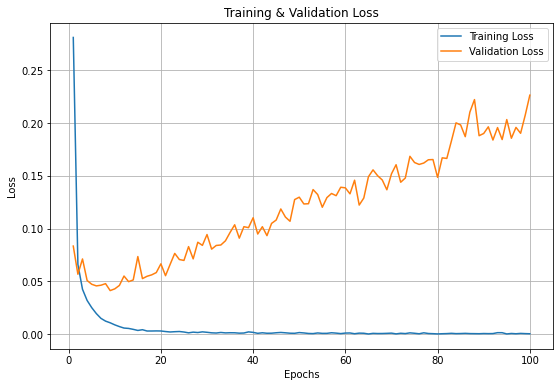

In [18]:
import matplotlib.pyplot as plt
epochs = range(1, len(Hist_mnist.history['loss'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 4ms/step - loss: 0.1687 - accuracy: 0.9919
Loss = 0.16872
Accuracy = 0.99190
